In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from information_driven_bars import *
from datetime import datetime

In [3]:
df = pd.read_csv("FX_INDEX_1-N107810851-part001.csv")

/var/folders/pp/1lf6swc57b51ffkjq285jgl40000gn/T/ipykernel_96306/59550052.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FX_INDEX_1-N107810851-part001.csv")


In [4]:
df.shape

(58004439, 25)

In [5]:
df.head()

,#RIC,Date[G],Time[G],GMT Offset,Type,Ex/Cntrb.ID,LOC,Price,Volume,Market VWAP,...,New Price,New Vol,Bid Yld,Ask Yld,30 Day ATM IV Call,60 Day ATM IV Call,90 Day ATM IV Call,30 Day ATM IV Put,60 Day ATM IV Put,90 Day ATM IV Put
0,JPY=,01-JAN-2006,17:09:51.571,0,OTC Quote,BMCE PARIS PAR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JPY=,01-JAN-2006,18:00:42.974,0,OTC Quote,HSBC NYC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JPY=,01-JAN-2006,18:00:53.311,0,OTC Quote,RABOBANK GFM LON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JPY=,01-JAN-2006,18:03:17.826,0,OTC Quote,LBW STG,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JPY=,01-JAN-2006,18:05:49.274,0,OTC Quote,GAZPROMBANK MOW,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['#RIC'].unique()

array(['JPY='], dtype=object)

In [8]:
df.describe()

,GMT Offset,LOC,Price,Volume,Market VWAP,Bid Price,Bid Size,Ask Price,Ask Size,New Price,New Vol,Bid Yld,Ask Yld,30 Day ATM IV Call,60 Day ATM IV Call,90 Day ATM IV Call,30 Day ATM IV Put,60 Day ATM IV Put,90 Day ATM IV Put
count,58004439.0,0.0,0.0,0.0,0.0,5.800444e+07,0.0,5.800444e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,NaN,NaN,NaN,NaN,1.098184e+02,NaN,1.098514e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN,NaN,9.088806e+00,NaN,9.087257e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,NaN,NaN,NaN,NaN,8.711000e+01,NaN,8.715000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.0,NaN,NaN,NaN,NaN,1.032200e+02,NaN,1.032500e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.0,NaN,NaN,NaN,NaN,1.126900e+02,NaN,1.127300e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.0,NaN,NaN,NaN,NaN,1.174000e+02,NaN,1.174300e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.0,NaN,NaN,NaN,NaN,1.241600e+02,NaN,1.241900e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['Price'] = (df['Bid Price'] + df['Ask Price'])/2

In [9]:
df['date'] = df['Date[G]'].astype(str) + "T" + df['Time[G]'].astype(str)

In [12]:
df['date'].head()

0    01-JAN-2006T17:09:51.571
1    01-JAN-2006T18:00:42.974
2    01-JAN-2006T18:00:53.311
3    01-JAN-2006T18:03:17.826
4    01-JAN-2006T18:05:49.274
Name: date, dtype: object

In [13]:
df['date'] = pd.to_datetime(df['date'], format = "%d-%b-%YT%H:%M:%S.%f")

In [16]:
tick_time, T_list, _ = tick_imbalance_bar(df['Price'][:10000], 100, 100)

In [17]:
tick_time

[100]

In [17]:
def tick_bar(price, n_tick):
    len_price=len(price)
    n_bars = int(np.floor(len_price / n_tick))
    ret = []
    for i in range(n_bars):
        start = i*n_tick; end = (i+1)*n_tick -1
        ret.append(price[end] - price[start])
    return ret

In [24]:
ret_tick = tick_bar(df1['Price'].to_numpy(), 1000)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        6.0000e+00, 9.0000e+00, 9.0000e+00, 1.0000e+01, 1.3000e+01,
        1.1000e+01, 1.2000e+01, 2.0000e+01, 2.7000e+01, 4.0000e+01,
        5.2000e+01, 6.9000e+01, 8.9000e+01, 1.3900e+02, 2.2900e+02,
        3.1300e+02, 5.7900e+02, 8.5800e+02, 1.6040e+03, 3.1310e+03,
        4.3780e+03, 7.6200e+03, 1.0349e+04, 8.7770e+03, 8.0610e+03,
        4.9570e+03, 2.5390e+03, 1.7620e+03, 9.3800e+02, 4.5300e+02,
        3.2900e+02, 1.7600e+02, 1.1100e+02, 8.0000e+01, 5.4000e+01,
        3.9000e+01, 3.7000e+01, 1.9000e+01, 2.30

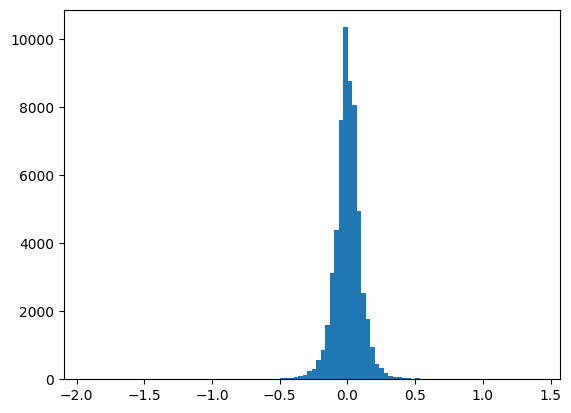

In [25]:
plt.hist(ret_tick, bins=100)

In [14]:
def volume_bar(price, volume, volume_th):
    len_price=len(price)
    ret = []; cum_vol = 0
    count = 0
    for i in range(len_price):
        if cum_vol == 0:
            start_price = price[i]
        cum_vol += volume[i]
        if cum_vol > volume_th:
            count += 1
            close_price = price[i]
            ret.append(close_price - start_price)
            cum_vol = 0
    print(count/len(price))
    return ret

In [15]:
df1 = df

In [16]:
ret_vol = volume_bar(df1['Price'].to_numpy(), df1['Volume'].to_numpy(), 10**11)

0.0


In [45]:
df1['Price'].describe()

count    4.288164e+07
mean     5.002666e+03
std      5.386896e+03
min      6.199300e+01
25%      1.500029e+03
50%      3.196610e+03
75%      5.268530e+03
max      3.195841e+04
Name: Price, dtype: float64

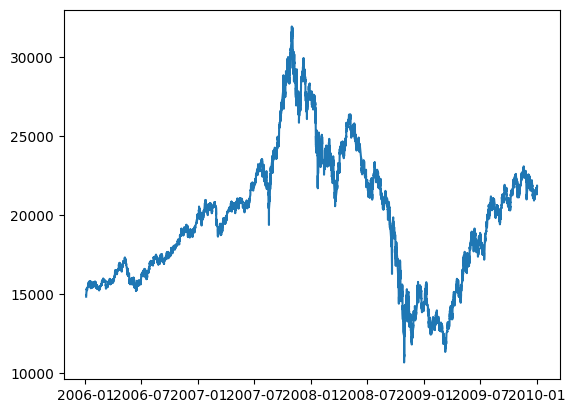

In [33]:
plt.plot(df1['date'], df1["Price"])

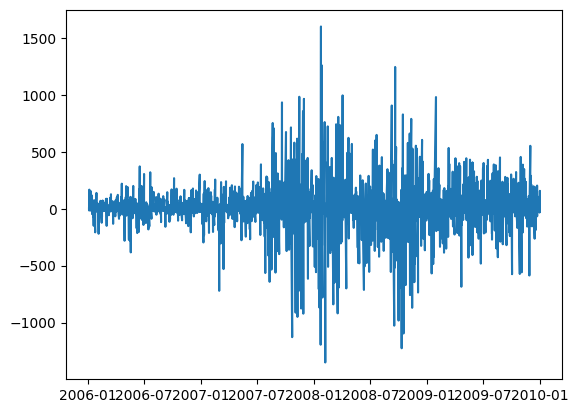

In [34]:
plt.plot(df1['date'], df1["Price"].diff())

In [54]:
len(df)/(365*4)

29394.90068493151

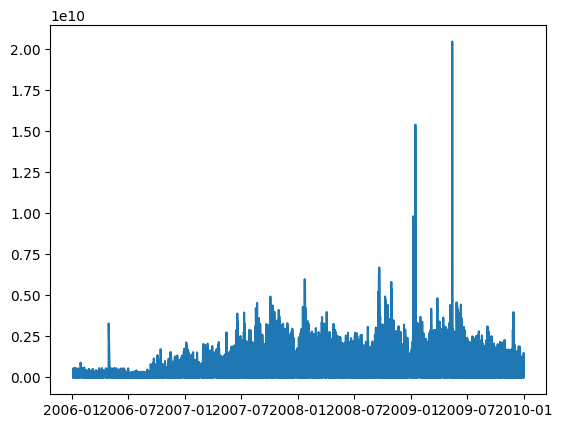

In [60]:
plt.plot(df1['date'], df1["Volume"])

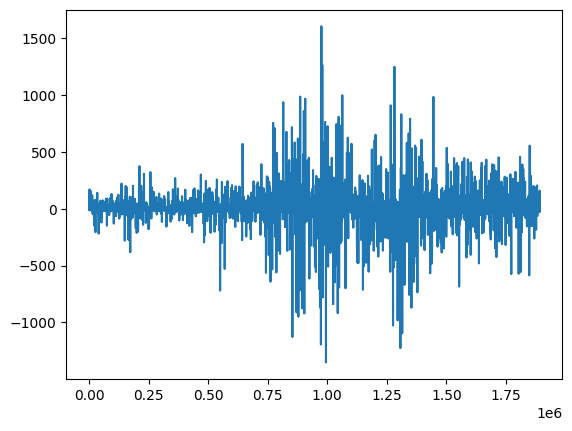

In [59]:
plt.plot(df1["Price"].diff())

In [65]:
df1.loc[975505:975515]

,#RIC,Current RIC,Date[L],Time[L],Type,Ex/Cntrb.ID,Price,Volume,Market VWAP,Bid Price,...,New Price,New Vol,Trd/Qte Date,30 Day ATM IV Call,60 Day ATM IV Call,90 Day ATM IV Call,30 Day ATM IV Put,60 Day ATM IV Put,90 Day ATM IV Put,date
975506,.HSI,NaN,22-JAN-2008,16:01:31.243301,Index,NaN,21757.63,5.941490e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-22 16:01:31.243301
975507,.HSI,NaN,22-JAN-2008,16:01:31.647572,Index,NaN,21757.63,5.979656e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-22 16:01:31.647572
975510,.HSI,NaN,23-JAN-2008,10:00:16.988797,Index,NaN,23359.20,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-23 10:00:16.988797
975511,.HSI,NaN,23-JAN-2008,10:00:17.103048,Index,NaN,23359.20,2.060479e+08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-23 10:00:17.103048
975512,.HSI,NaN,23-JAN-2008,10:00:31.518414,Index,NaN,23337.45,2.060479e+08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-23 10:00:31.518414
975513,.HSI,NaN,23-JAN-2008,10:00:31.678560,Index,NaN,23337.45,2.299089e+08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-23 10:00:31.678560
975514,.HSI,NaN,23-JAN-2008,10:00:46.283094,Index,NaN,23366.21,2.299089e+08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-23 10:00:46.283094
975515,.HSI,NaN,23-JAN-2008,10:00:46.437381,Index,NaN,23366.21,2.452883e+08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-23 10:00:46.437381


In [20]:
df2 = df1.copy()
df2.index = df2['date']
df2.head()

,#RIC,Date[G],Time[G],GMT Offset,Type,Ex/Cntrb.ID,LOC,Price,Volume,Market VWAP,...,New Vol,Bid Yld,Ask Yld,30 Day ATM IV Call,60 Day ATM IV Call,90 Day ATM IV Call,30 Day ATM IV Put,60 Day ATM IV Put,90 Day ATM IV Put,date
date,,,,,,,,,,,,,,,,,,,,,
2006-01-01 17:09:51.571,JPY=,01-JAN-2006,17:09:51.571,0,OTC Quote,BMCE PARIS PAR,NaN,117.695,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01 17:09:51.571
2006-01-01 18:00:42.974,JPY=,01-JAN-2006,18:00:42.974,0,OTC Quote,HSBC NYC,NaN,117.835,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01 18:00:42.974
2006-01-01 18:00:53.311,JPY=,01-JAN-2006,18:00:53.311,0,OTC Quote,RABOBANK GFM LON,NaN,117.845,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01 18:00:53.311
2006-01-01 18:03:17.826,JPY=,01-JAN-2006,18:03:17.826,0,OTC Quote,LBW STG,NaN,117.830,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01 18:03:17.826
2006-01-01 18:05:49.274,JPY=,01-JAN-2006,18:05:49.274,0,OTC Quote,GAZPROMBANK MOW,NaN,117.830,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01 18:05:49.274


In [39]:
ohlc = df2['Price'].resample('30Min').ohlc()

In [40]:
ohlc.head()

,open,high,low,close
date,,,,
2006-01-01 17:00:00,117.695,117.695,117.695,117.695
2006-01-01 17:30:00,NaN,NaN,NaN,NaN
2006-01-01 18:00:00,117.835,117.845,117.820,117.830
2006-01-01 18:30:00,NaN,NaN,NaN,NaN
2006-01-01 19:00:00,117.825,117.875,117.825,117.870


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        4.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 9.000e+00, 1.200e+01,
        1.600e+01, 1.100e+01, 1.700e+01, 2.200e+01, 3.900e+01, 5.000e+01,
        6.100e+01, 8.600e+01, 9.800e+01, 1.750e+02, 2.250e+02, 3.200e+02,
        5.020e+02, 8.020e+02, 1.067e+03, 1.962e+03, 3.453e+03, 5.667e+03,
        8.938e+03, 7.984e+03, 4.975e+03, 3.609e+03, 2.061e+03, 1.206e+03,
        7.840e+02, 4.540e+02, 2.870e+02, 2.100e+02, 1.360e+02, 9.500e+01,
        7.900e+01, 5.500e+01, 2.800e+01, 1.900e+01, 2.800e+01, 1.500e+01,
        1.400e+01, 1.200e+01, 5.000e+0

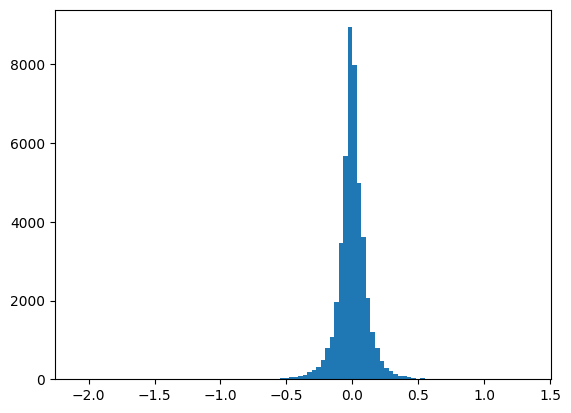

In [41]:
plt.hist(ohlc['close']-ohlc['open'], bins=100)

In [26]:
df1.shape

(0, 24)

In [42]:
ret_vol_norm = (ret_vol - np.mean(ret_vol))/np.std(ret_vol)

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 3.000e+00, 7.000e+00, 4.000e+00, 4.000e+00, 6.000e+00,
        3.000e+00, 6.000e+00, 1.200e+01, 1.100e+01, 9.000e+00, 7.000e+00,
        1.100e+01, 1.900e+01, 3.100e+01, 3.800e+01, 5.000e+01, 7.100e+01,
        1.040e+02, 1.750e+02, 3.640e+02, 7.920e+02, 1.537e+03, 2.969e+03,
        4.210e+03, 2.687e+03, 1.337e+03, 6.050e+02, 3.110e+02, 1.550e+02,
        9.300e+01, 6.700e+01, 4.300e+01, 3.300e+01, 3.300e+01, 2.400e+01,
        1.100e+01, 1.300e+01, 9.000e+00, 1.000e+01, 1.500e+01, 5.000e+00,
        7.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 6.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 1.000e+0

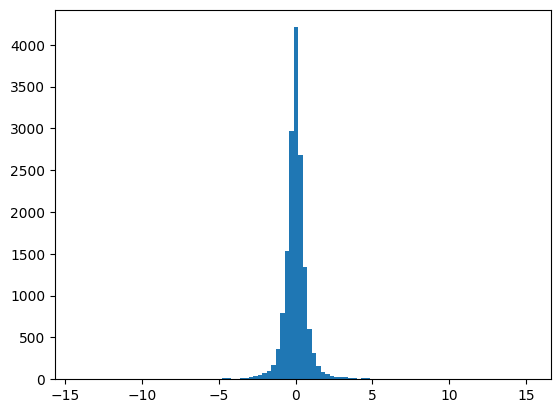

In [43]:
plt.hist(ret_vol_norm, bins=100)

In [52]:
len(df1)

534492

In [56]:
df1['volume'].sum() / len(df1)

17.037727412197

In [36]:
import statsmodels.api as sm 

In [64]:
ret_tick_st = np.array(ret_tick)
ret_tick_st = (ret_tick_st - ret_tick_st.mean())/ret_tick_st.std()

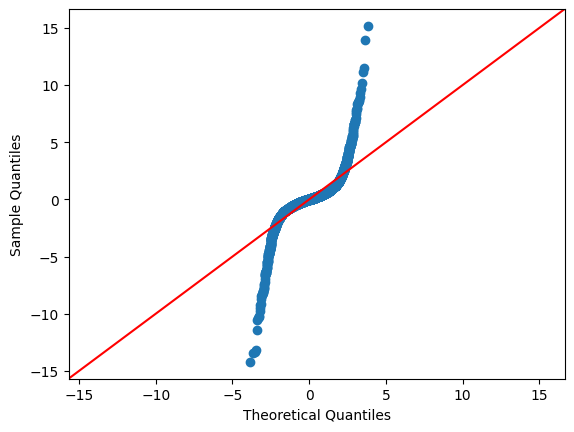

In [48]:
sm.qqplot(ret_vol_norm, line='45')
print("")

In [50]:
from scipy.stats import kstest
stat, pval = kstest(ret_vol_norm, 'norm')
stat, pval

(0.14311204163179458, 6.884318821031461e-286)

In [67]:
ret_vol_st = np.array(ret_vol)
ret_vol_st = (ret_vol_st - ret_vol_st.mean())/ret_vol_st.std()

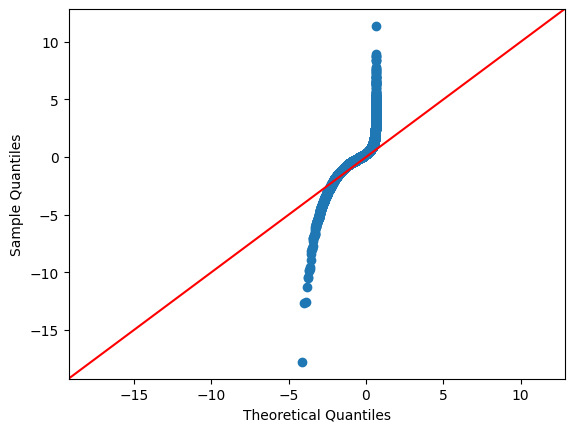

In [42]:
ohlc_return = ohlc['close'] - ohlc['open']
ohlc_norm = (ohlc_return - np.mean(ohlc_return))/np.std(ohlc_return)
sm.qqplot(ohlc_norm, line='45')
print("")

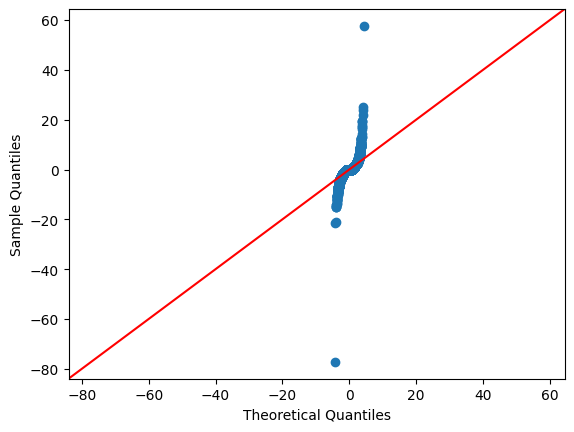

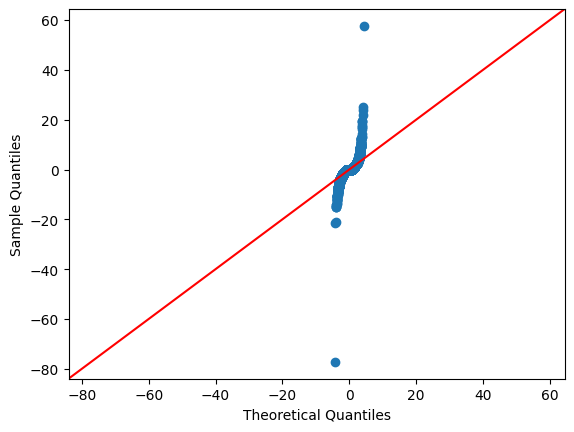

In [68]:
sm.qqplot(ret_vol_st, line='45')